# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [5]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [7]:
df_taxi.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [17]:
df_taxi.info() #other way to answer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [11]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [16]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

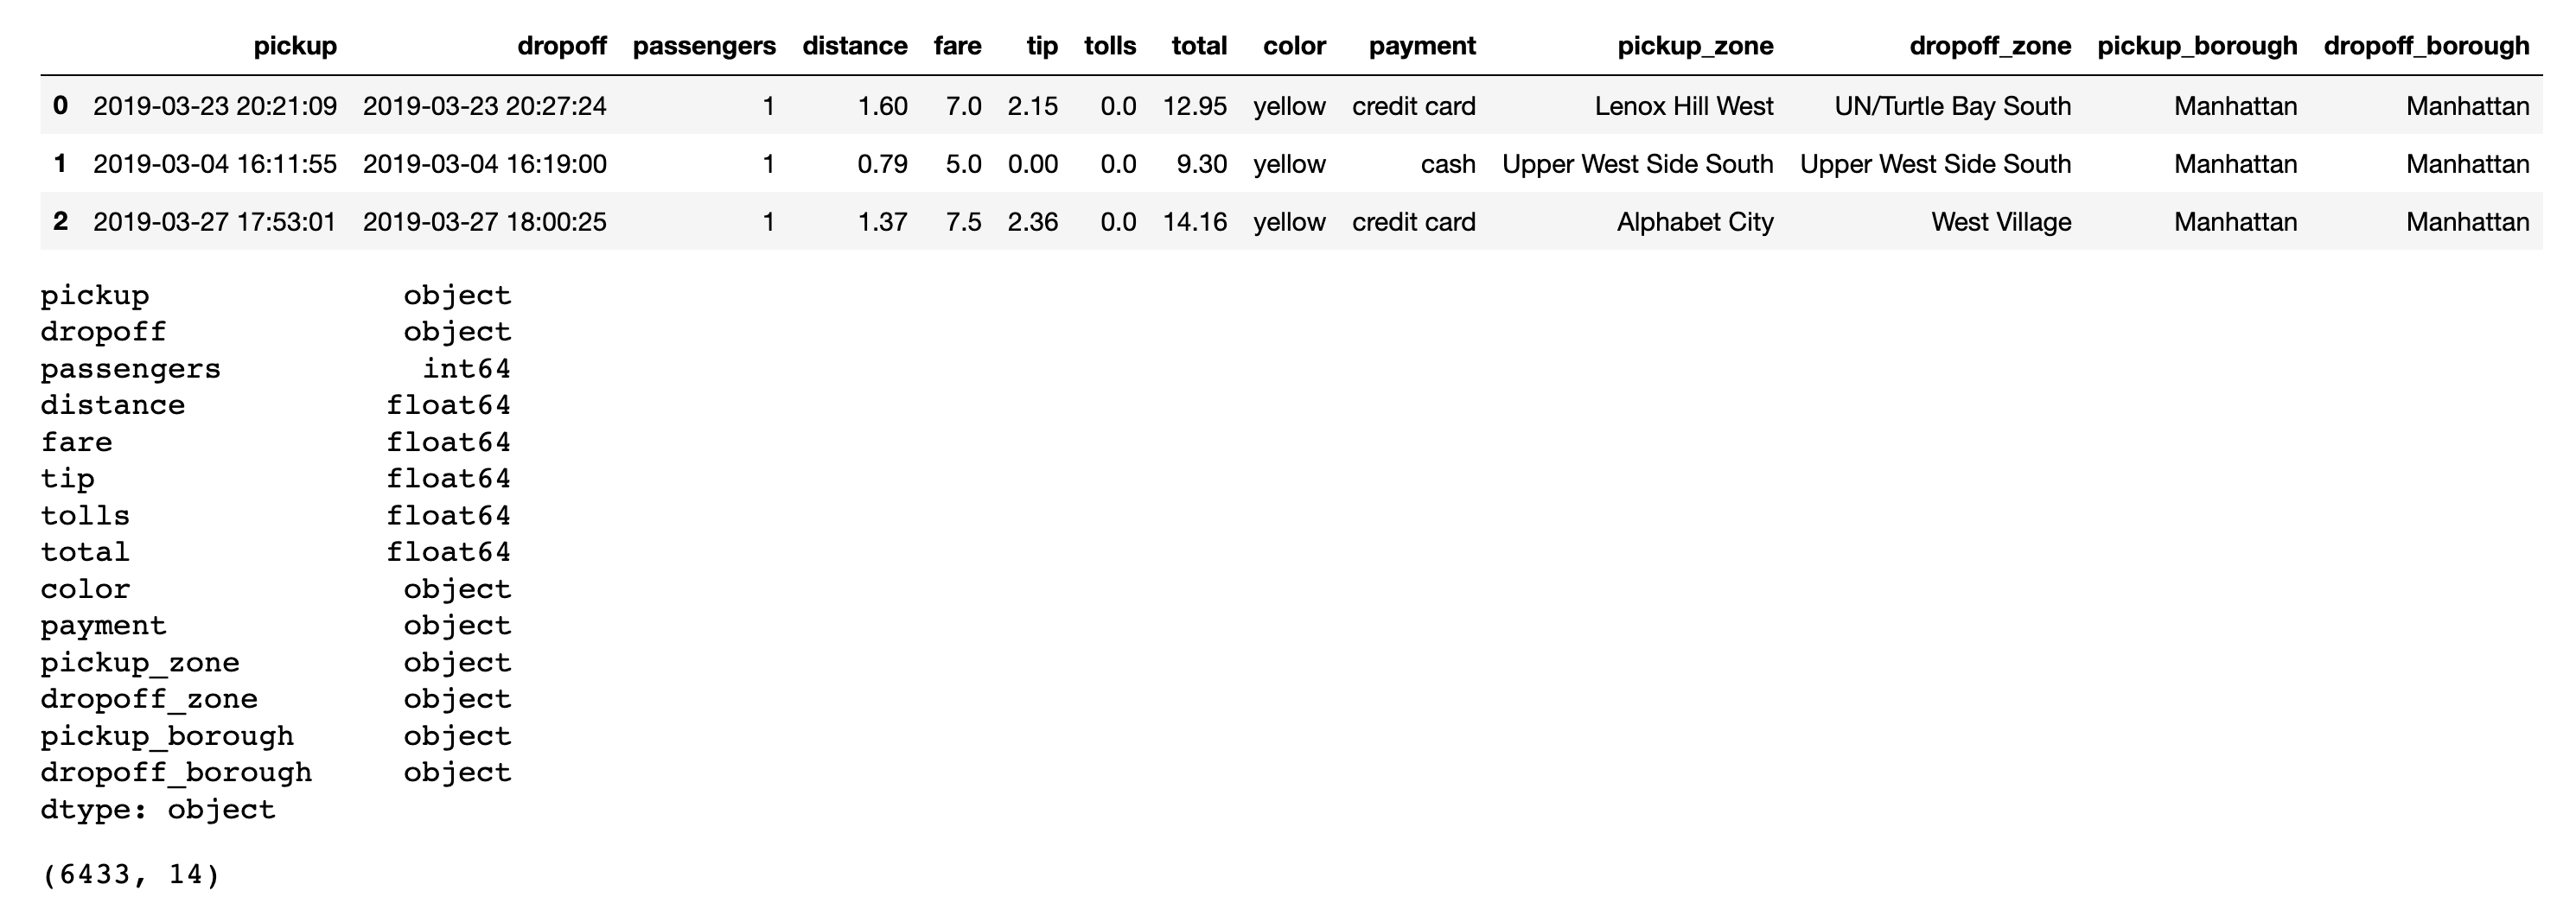

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [20]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [26]:
# Знаходимо назву колонки з найбільшою кількістю пропущених значень
#df_taxi.isna().sum().idxmax()
#фільтр - пропущені дані чи ні
#df_taxi[df_taxi.isna().sum().idxmax()].isna()
# Виводимо фідфільтровані рядки, де колонка з найбільшою кількістю пропущених значень має пропущені значення
df_taxi[df_taxi[df_taxi.isna().sum().idxmax()].isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


1) Чому, на ваш погляд, в цих рядках є відсутні дані в кількох колонках? Чому ви так думаєте?

Це може бути пов'язано з тим, що дані можуть бути зібрані за допомогою відстеження GPS водія або пасажира, але потрібний користувач міг вимкнути GPS. Також можливо, що є деякі локації, які не пов'язані з жодною зоною. Я переглянула інформацію на веб-сайтах https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf та https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page, але не знайшла, як збирається інформація для кожної колонки.

2) чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли? Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.

На мою думку, існує три можливості. Перша - пасажир прибув до початкової точки або скасував поїздку, але все ж мусив за неї заплатити.

Ще одна опція - вимкнуто відстеження відстані в цьому автомобілі або додатку користувача (залежно від того, як збирається інформація про відстань).

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [28]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [29]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

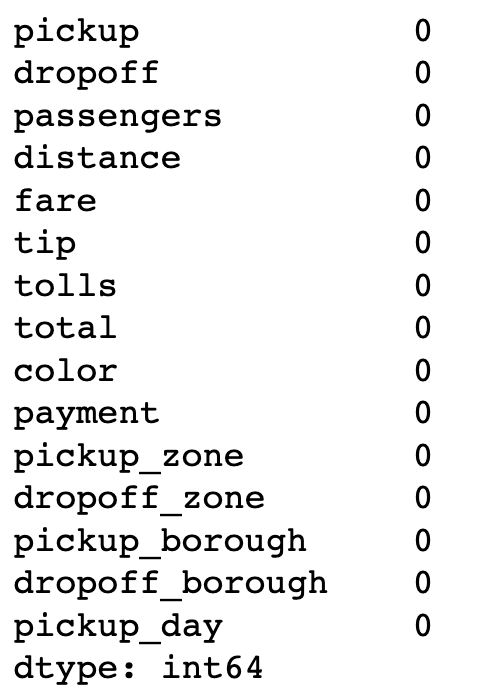

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [36]:
df_taxi_clean.pickup = df_taxi_clean.pickup.astype('datetime64[ns]') #i actually had datetime type initially

Після виконання завдання запустіть наступну клітинку:

In [37]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

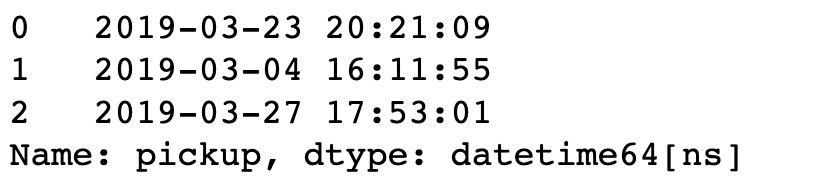

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [38]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

In [39]:
df_taxi_clean['pickup_day'].head(3)

0   2019-03-23
1   2019-03-04
2   2019-03-27
Name: pickup_day, dtype: datetime64[ns]

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

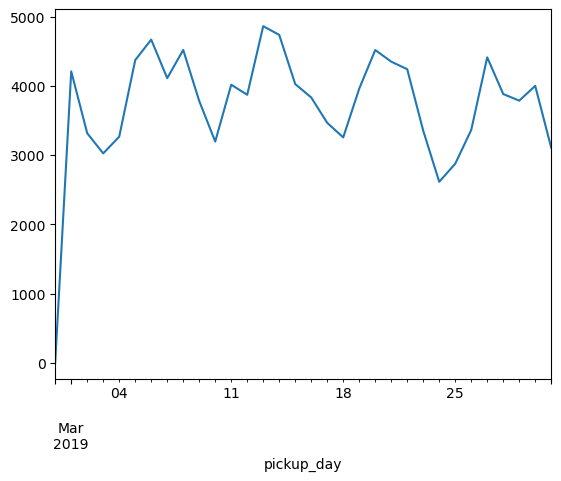

In [50]:
df_taxi_clean.groupby('pickup_day').total.sum().plot();

Дивно, як швидко графік зростає на початку, тобто сума першого дня значно менша, ніж у наступних днів.

Можливо, першого дня збирання даних були технічні проблеми, що призвели до неповної збірки інформації або втрати деяких даних.

Також можливо, що на першому дні були обмеження або проблеми зі збором даних, які були вирішені у наступні дні, що призвело до більш повного зібрання інформації.

Інша можлива причина - початковий день може бути не повний робочий день або включати період, коли відслідковування поїздок ще не було підключене.

Очікується графік:

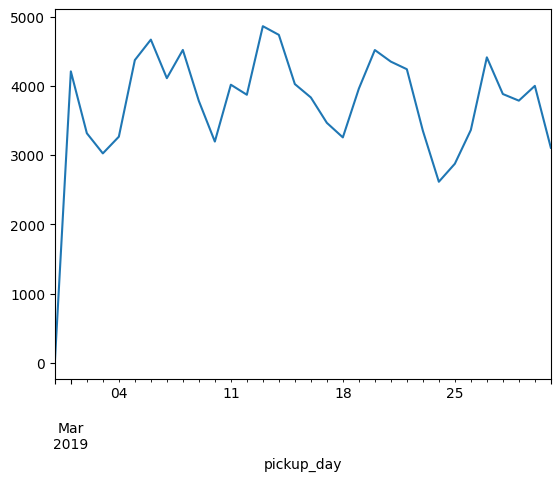

6.Виведіть кількість рядків для кожного pickup_day.

In [49]:
#df_taxi_clean.groupby('pickup_day').total.count()
#df_taxi_clean.pivot_table(index= 'pickup_day', aggfunc='size')

df_taxi_clean.groupby('pickup_day').size() #shortest way

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [61]:
df_taxi_clean.drop(index = df_taxi_clean[df_taxi_clean.pickup_day == '2019-02-28'].index, inplace = True)
#df_taxi_clean.shape

(6432, 15)

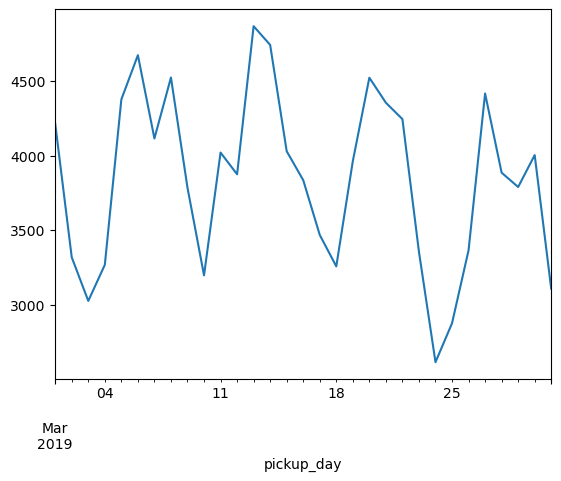

In [62]:
df_taxi_clean.groupby('pickup_day').total.sum().plot();

Очікуваний графік:

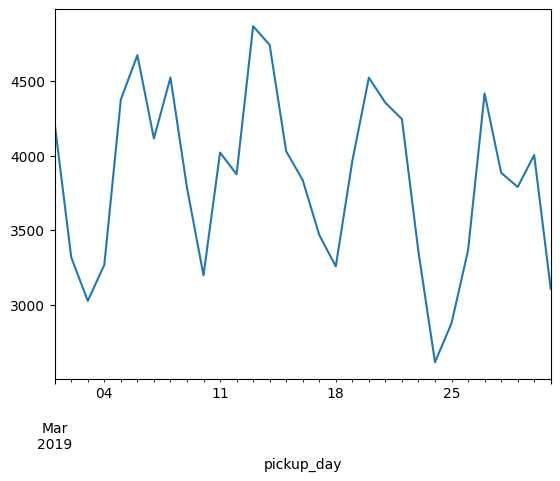

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [146]:
#fastest(and the only i could think of) way to filter NA column from the beginning
borough_pivot = df_taxi_clean[df_taxi_clean.pickup_borough != 'NA'].pivot_table(index =['pickup_day'] , columns = ['pickup_borough'], values = ["total"], aggfunc = "sum")

In [91]:
#I could not Drop specific columns from the ready pivot table 
#not filtered pivot
#borough_pivot = df_taxi_clean.pivot_table(index =['pickup_day'] , columns = ['pickup_borough'], values = ["total"], aggfunc = "sum")
#Drop does not work:  borough_pivot.drop(columns=['Brooklyn', 'Manhattan']) (i thought NA name was the problem, but no)

In [199]:
borough_pivot1 = df_taxi_clean.pivot_table(index =['pickup_day'] , columns = ['pickup_borough'], values = "total", aggfunc = "sum")
borough_pivot1.drop(columns=['NA'], inplace= True)

In [200]:
borough_pivot1

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

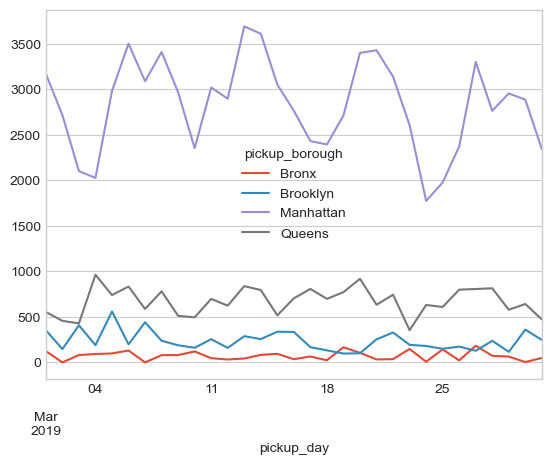

In [150]:
borough_pivot1.fillna(0).plot();

У Bronx найчастіше найбільша сума денних платежів за поїздки на таксі

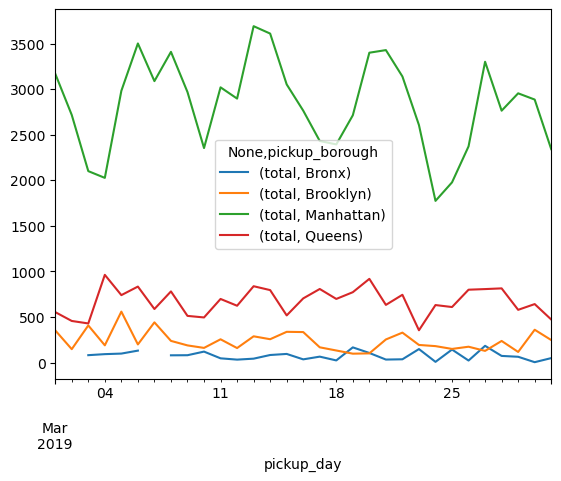

In [100]:
borough_pivot.plot(); #if NA is not 0, the line is interrupted

Очікуваний графік :

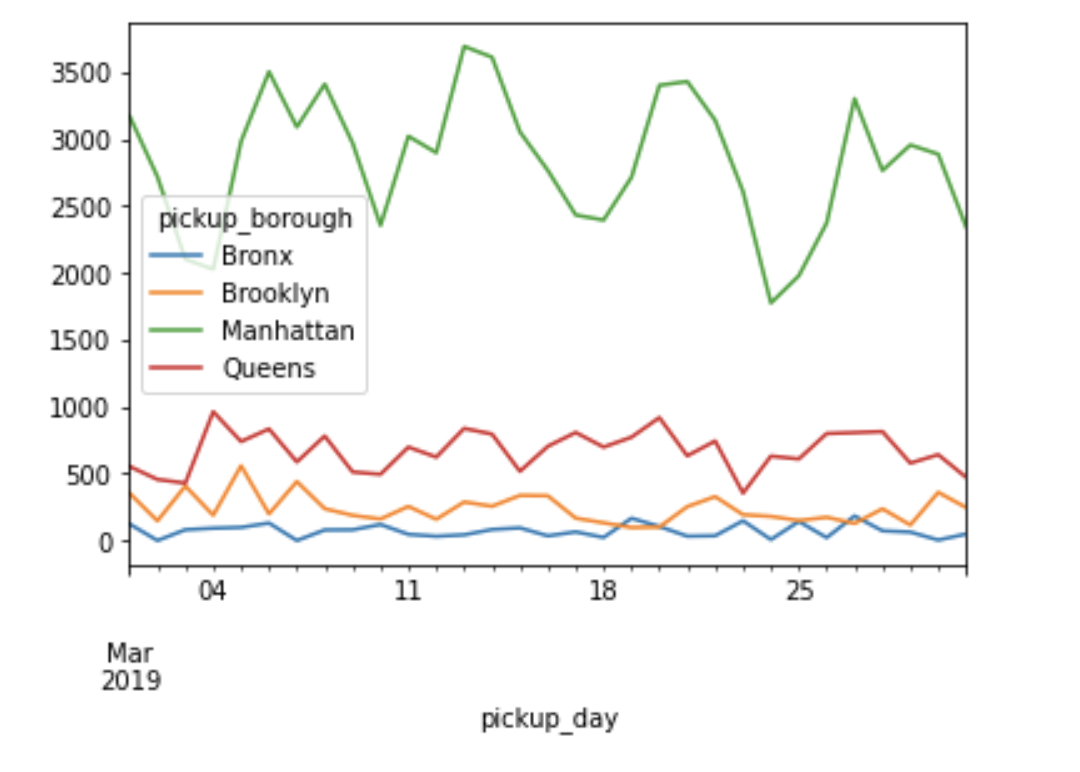

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

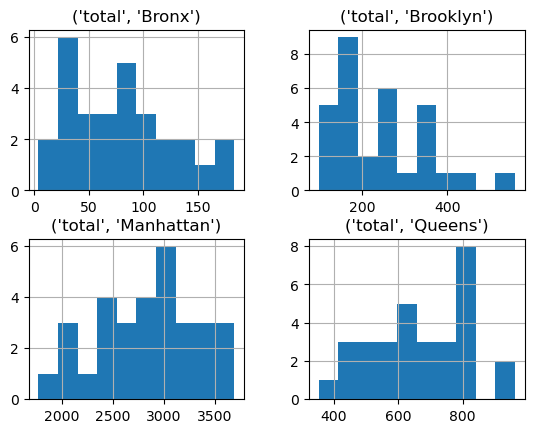

In [107]:
borough_pivot.hist(bins = 10);

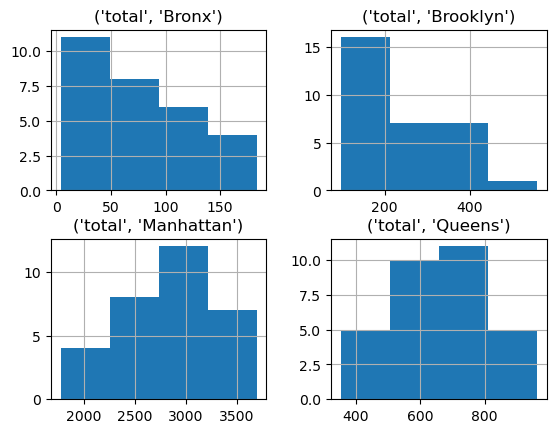

In [109]:
borough_pivot.hist(bins = 4);

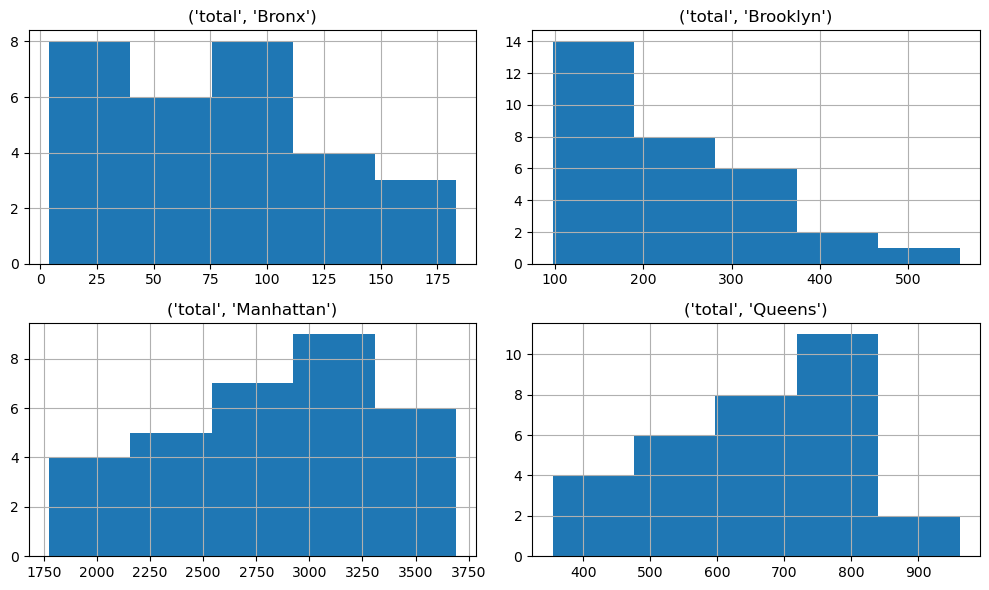

In [112]:
borough_pivot.hist(bins = 5, figsize=(10,6));
plt.tight_layout();

Я думаю, що 5 bins буде достатньо для цих гістограм, щоб відображати тенденції збільшення або зменшення загальної суми без видимих прогалин у випадку, коли конкретні загальної суми значення відсутні в даних (оскільки у нас не так багато значень).
Хоч якщо взяти 7-10 bins, видно пікові значення, і можна дослідити чому саме вони популярні, але не бачу сенсу це робити, коли на кожному проміжку до 10ти значень.

Приклад одного з правильних виконань завдання:

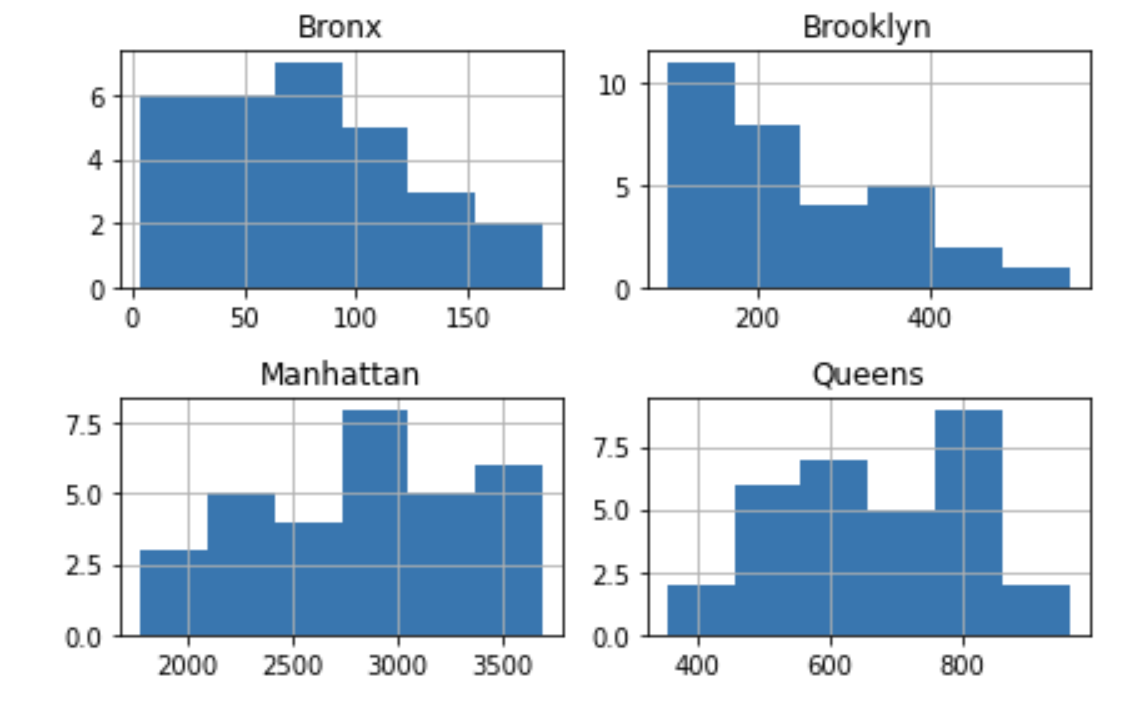

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

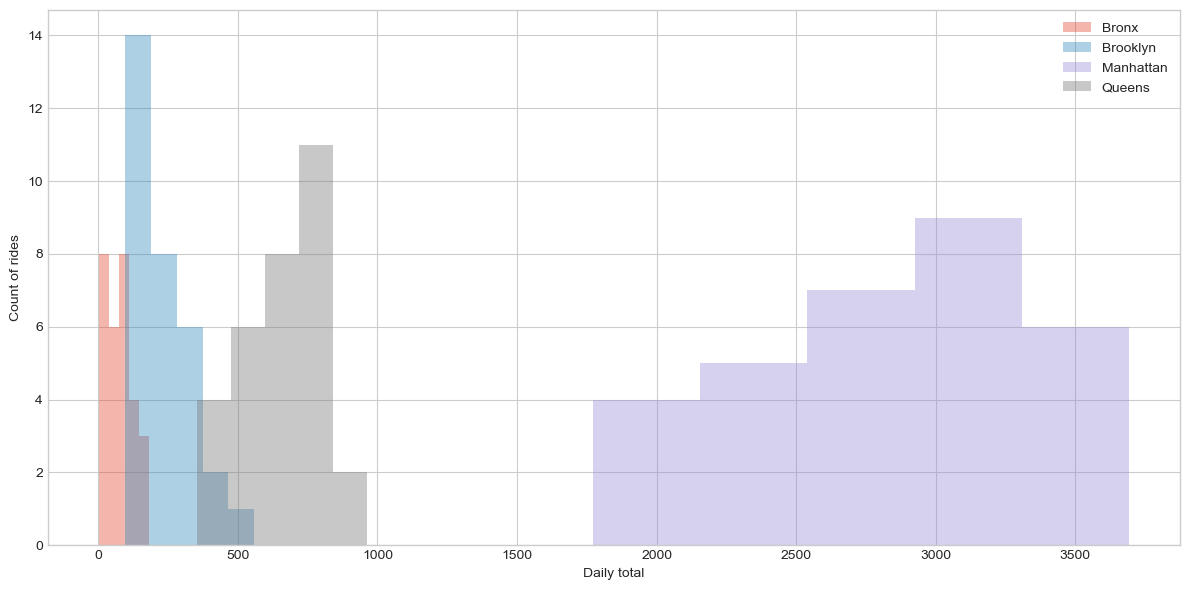

In [135]:
plt.figure(figsize=(12,6))
for col in borough_pivot.columns:
    plt.hist(borough_pivot[col], bins=5, alpha=0.4, label=col[1])
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.legend()
plt.tight_layout()
plt.style.use('seaborn-v0_8-whitegrid')
plt.show();

Очікуваний результат:

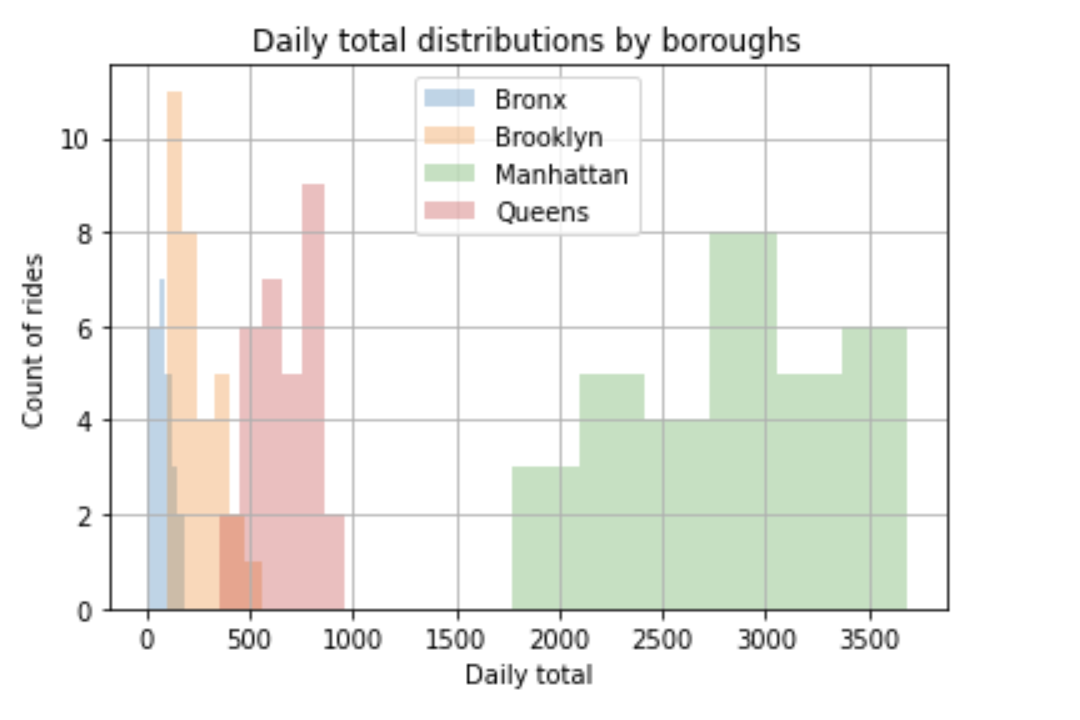

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

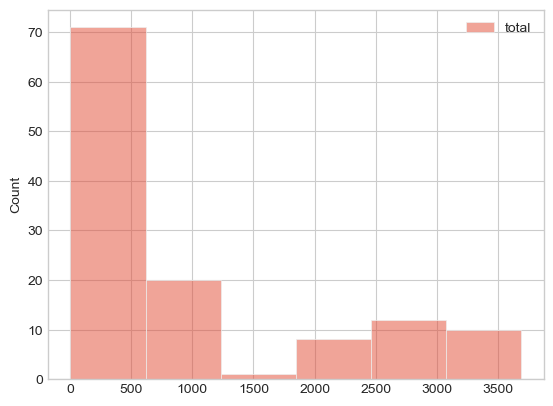

In [136]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

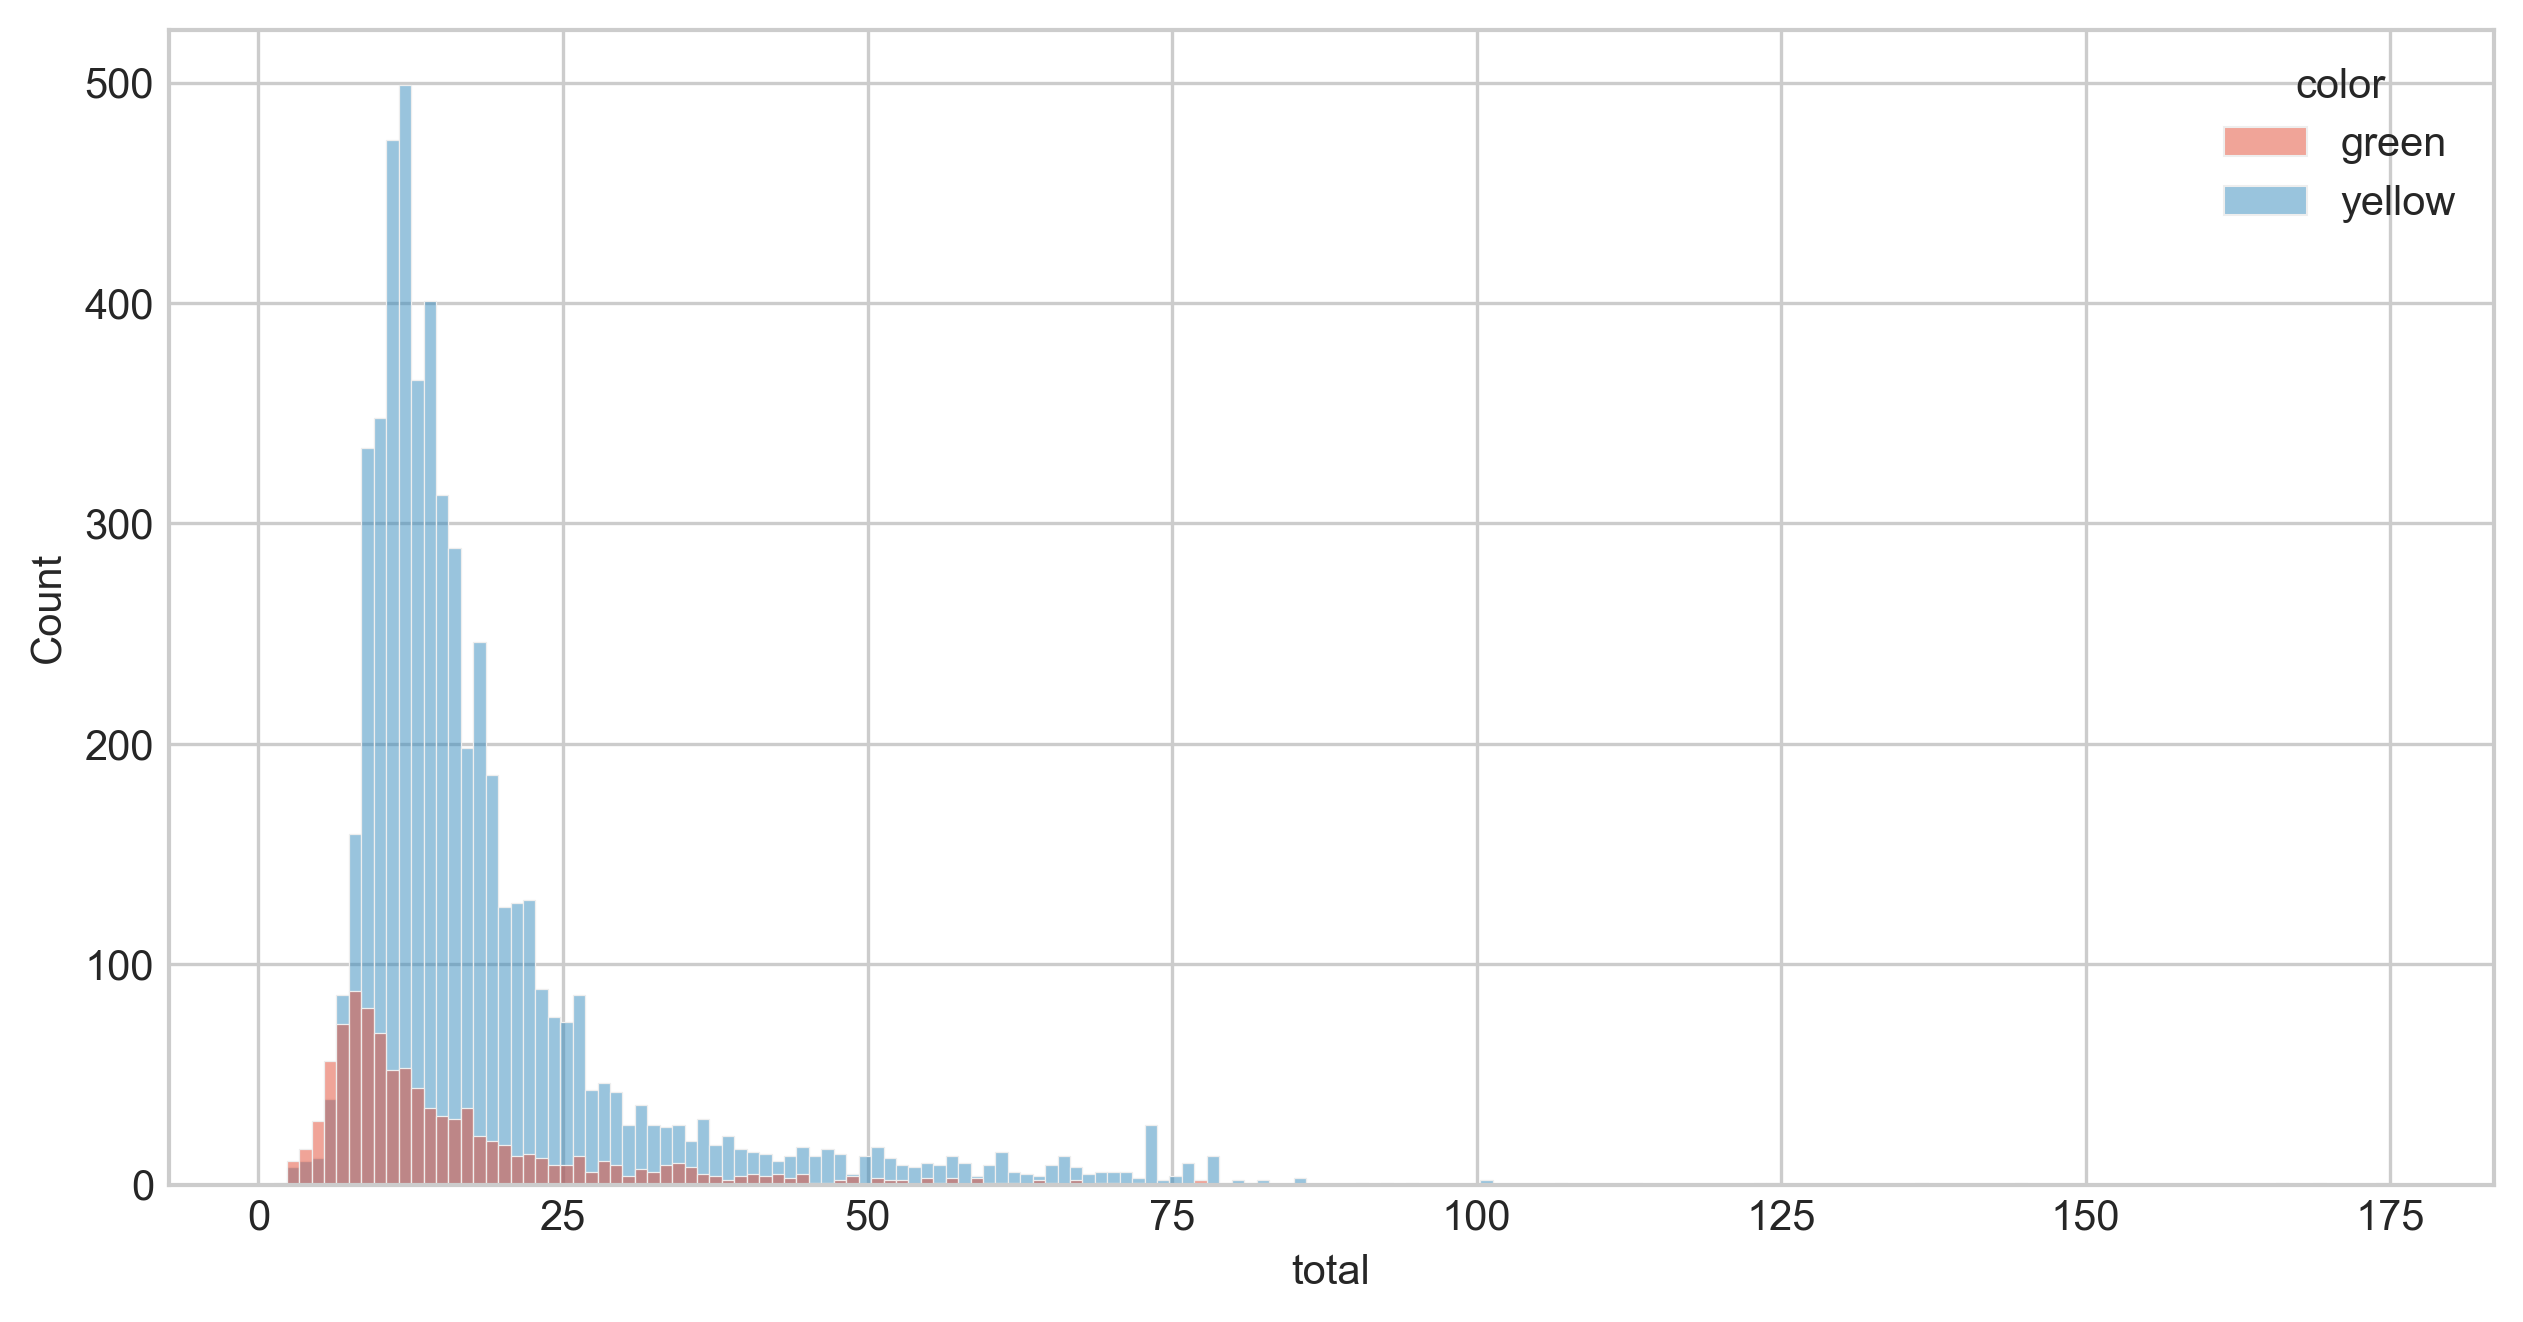

In [167]:
plt.figure(figsize=(10,5), dpi=300)

sns.histplot(
    data=df_taxi_clean.sort_values('color'),
    x='total', hue='color'
);
#.figure.set_size_inches(10, 5);

Очікуваний результат:

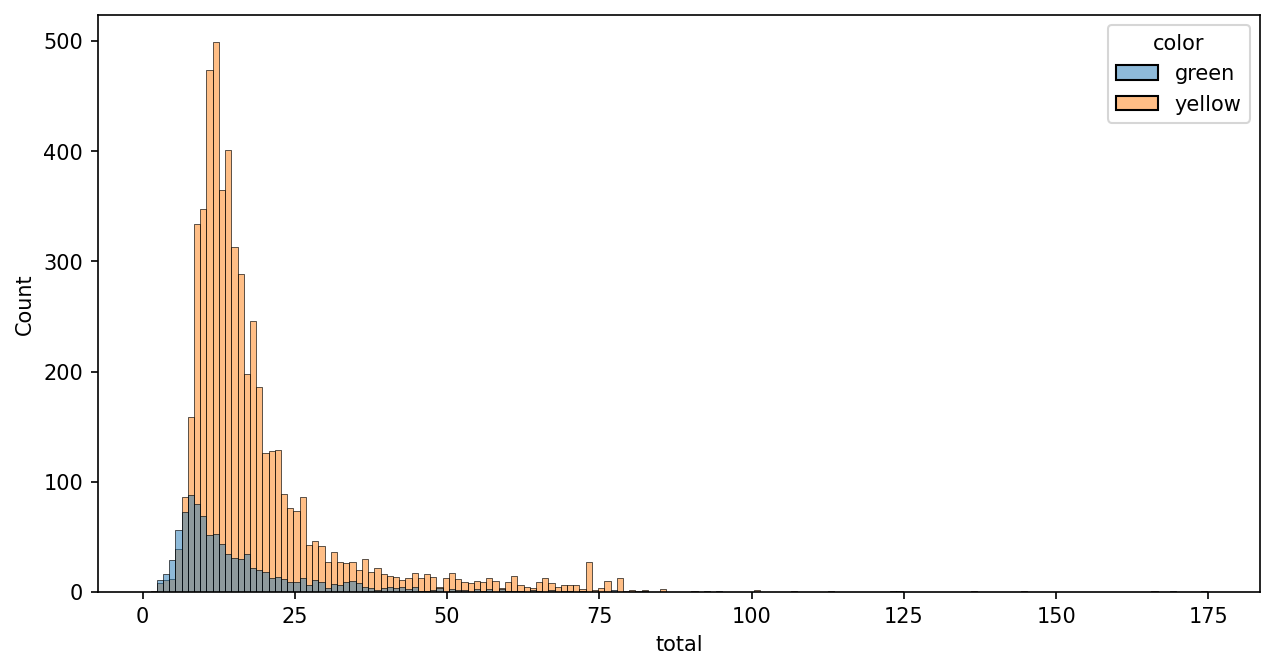

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

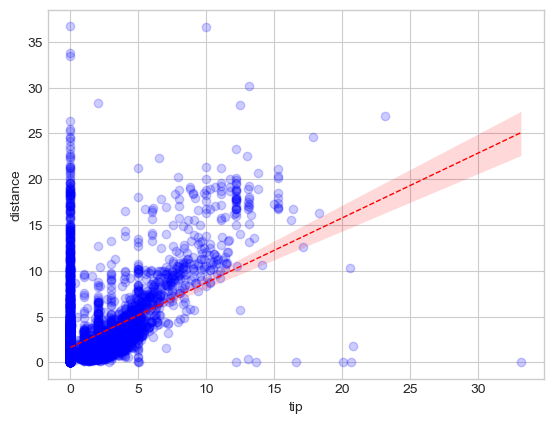

In [175]:
sns.regplot(data=df_taxi_clean,
    x='tip', y ='distance', scatter_kws={'color': 'blue', 'alpha': 0.2}, line_kws={'color': 'red', 'linewidth': 1, 'linestyle': '--'},
);

Один з можливих результатів (побудовано з seaborn):

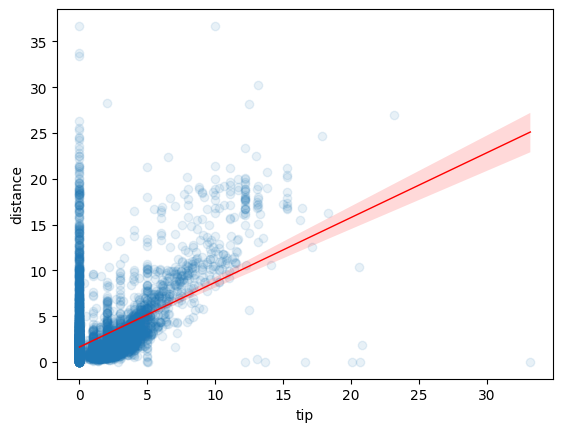

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Те, що є користувачі, які не дають чайових, яка б не була дальність поїздки, і їх досить багато.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

<Figure size 3000x1500 with 0 Axes>

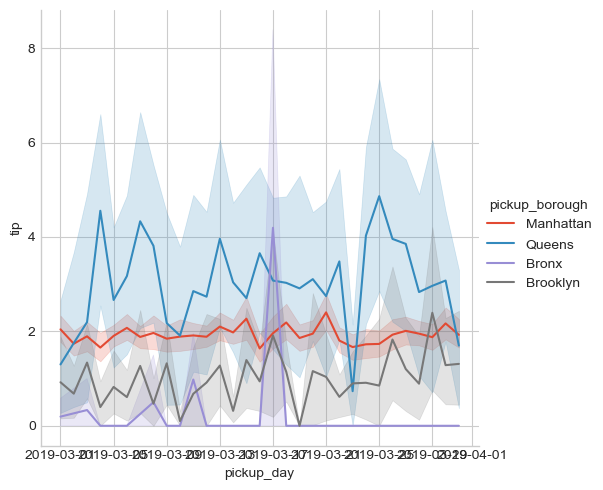

In [222]:
plt.figure(figsize=(10,5), dpi=300)
sns.relplot(
    data=df_taxi_clean[df_taxi_clean.pickup_borough != 'NA'], kind="line",
    x="pickup_day", y="tip", hue="pickup_borough");

#those plots show count of numbers

#how to turn dates? 

#why size does not change? why ';' does not help to erase  <Figure size 3000x1500 with 0 Axes> ?

Один з можливих результатів (побудовано з seaborn):

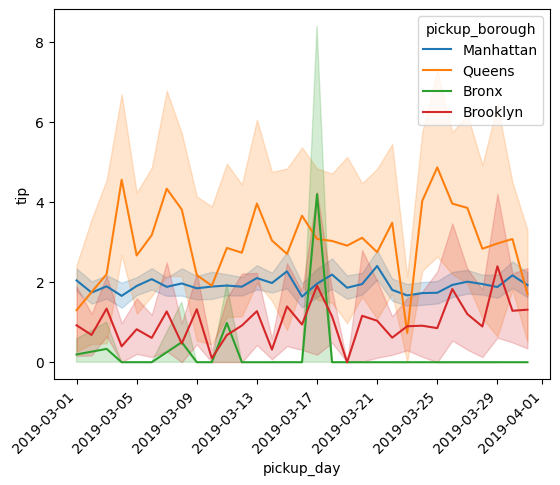

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

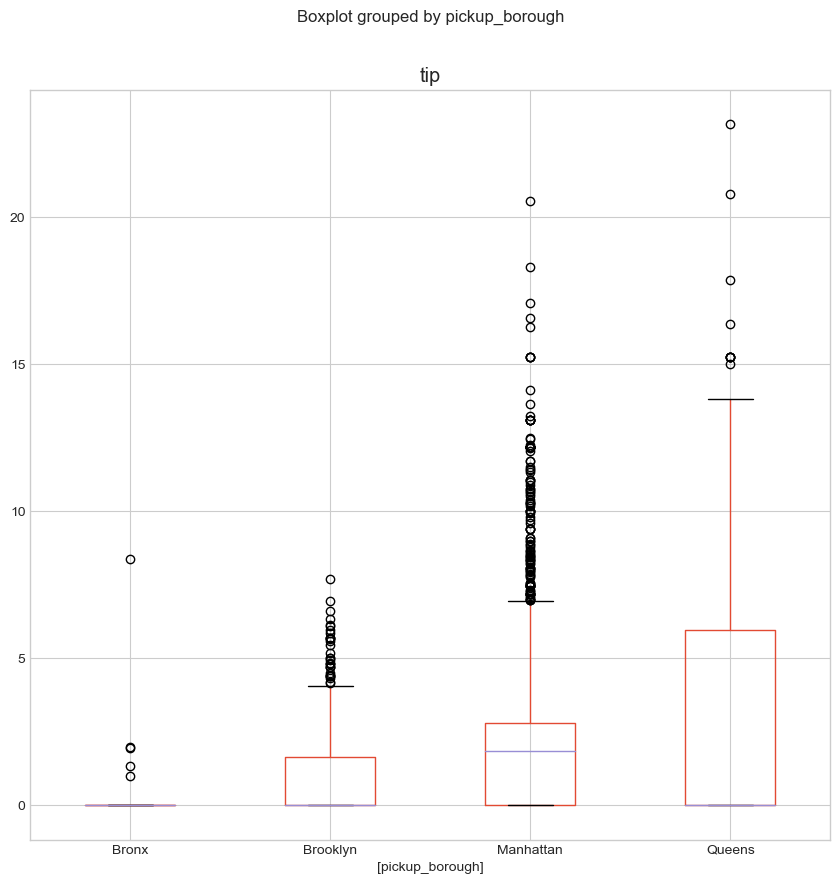

In [237]:
df_taxi_clean[df_taxi_clean.pickup_borough != 'NA'][['tip','pickup_borough']].boxplot(by='pickup_borough', figsize=(10,10));

Один з можливих результатів (побудовано з seaborn):

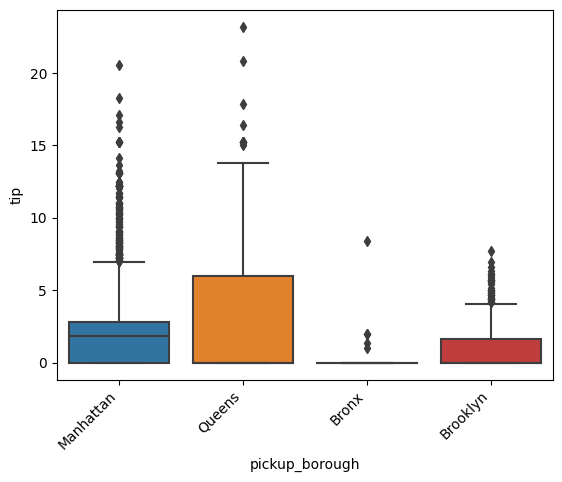

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

Спочатку я хотіла перевірити, чи відрізняється сума чайових протягом тижня та між районами, а не кількість чайових як у завданні.

In [406]:
#wanted to make a graph with sum of tips
tips_pivot = df_taxi_clean.pivot_table(index =['pickup_day'] , columns = ['pickup_borough'], values = "tip", aggfunc = "sum").drop(columns=['NA'])
tips_pivot.head(2)

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,1.36,15.68,394.33,28.60
2019-03-02,NaN,6.81,297.37,29.79


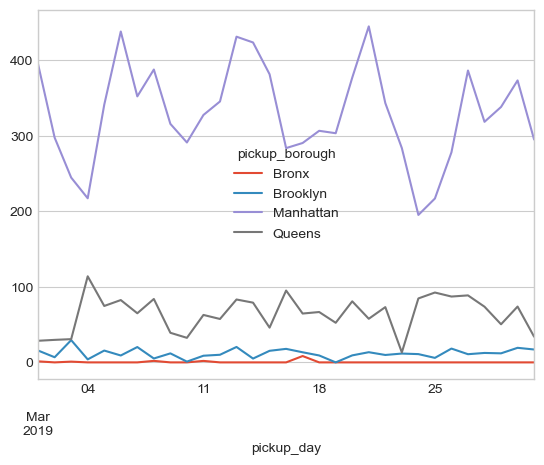

In [407]:
tips_pivot.fillna(0).plot();

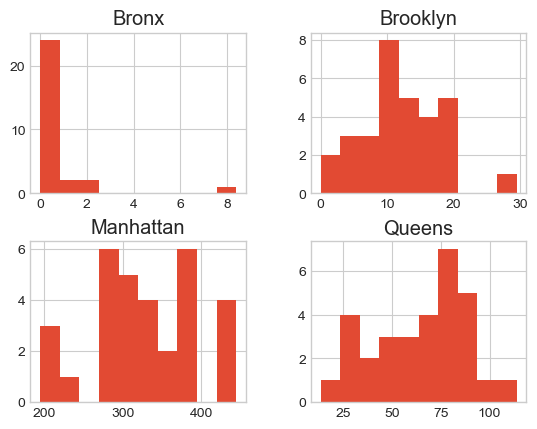

In [408]:
tips_pivot.hist(); #i can see variation of the sum of tips above, so this graph is not very informative, just to practice. 

Потім я зрозуміла, що сума чайових не є настільки інформативною, оскільки кількість та відстань поїздок можуть відрізнятися для різних районів. Тому я вирішила порівняти середні чайовi у різних районах.

Крім того, я працювала лише з поїздками, оплаченими кредитною карткою, оскільки я виявила (на наведеному нижче графіку), що для поїздок, оплачених готівкою, зазвичай чайові становлять 0. Я припускаю, що це тому, що готівкові чайові не відстежуються системою. (У реальному житті я б запитала або прочитала, як саме це працює)

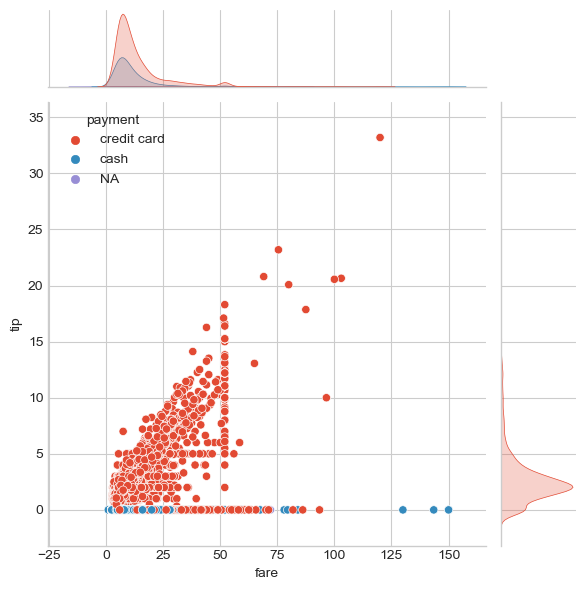

In [409]:
sns.jointplot(data=df_taxi_clean, x="fare", y="tip", hue="payment");

In [410]:
tips_mean = df_taxi_clean[(df_taxi_clean.pickup_borough != 'NA')&(df_taxi_clean.payment == "credit card")].groupby(['pickup_day', 'pickup_borough'])['tip'].mean().reset_index()

In [411]:
tips_mean.head()

,pickup_day,pickup_borough,tip
0,2019-03-01,Bronx,0.194286
1,2019-03-01,Brooklyn,1.568000
2,2019-03-01,Manhattan,2.611457
3,2019-03-01,Queens,2.860000
4,2019-03-02,Brooklyn,0.972857


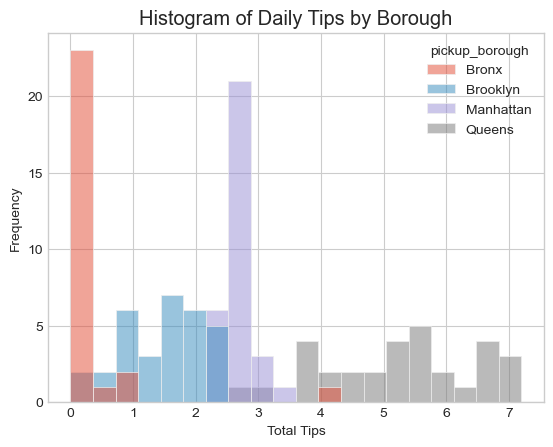

In [412]:
# Plot histogram using seaborn
sns.histplot(data=tips_mean, x='tip', hue='pickup_borough', bins=20)

# Set plot title and labels
plt.title('Histogram of Daily Tips by Borough')
plt.xlabel('Total Tips')
plt.ylabel('Frequency')

# Show the plot
plt.show()

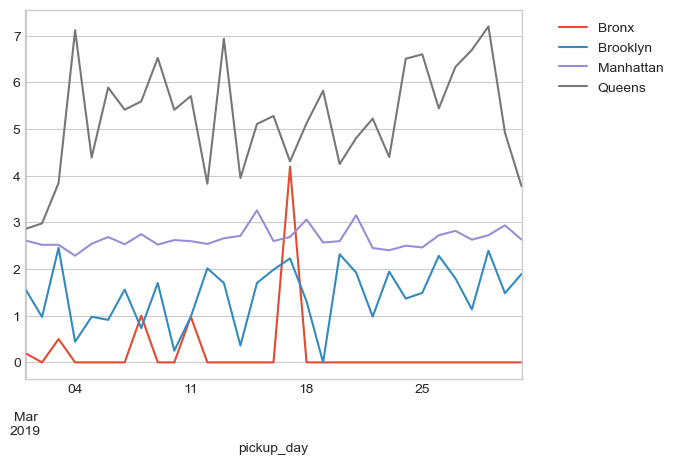

In [413]:
tips_mean_pivot = df_taxi_clean[(df_taxi_clean.pickup_borough != 'NA')&(df_taxi_clean.payment == "credit card")].pivot_table(index = ['pickup_day'], columns = ['pickup_borough'], values = 'tip', aggfunc = 'mean')

tips_mean_pivot.fillna(0).plot();

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');



Середні щоденнi чайовi найвищi у районі Квінс, хоча найвища сума чайових є найбільшою в Манхеттені.

Отже, "середні щоденні чайові" відрізняються між районами, але ми повинні пам'ятати, що вони також пов'язані з відстанню. Тому я створила нову колонку з розміром чайових за милю.

In [414]:
df_taxi_clean['tip_per_m'] = [tip/distance if distance > 0.1 else 'NA' for tip, distance in zip(df_taxi_clean['tip'], df_taxi_clean['distance'])]

In [416]:
df_taxi_clean[df_taxi_clean.distance <= 0.1].head(3) # here i can see NA in the column tip_per_m

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,tip_per_m
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.0,100.38,yellow,credit card,NA,NA,NA,NA,2019-03-30,NA
88,2019-03-16 05:08:02,2019-03-16 05:08:20,1,0.07,2.5,0.00,0.0,3.80,yellow,cash,Astoria,Astoria,Queens,Queens,2019-03-16,NA
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.00,2.5,0.00,0.0,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,2019-03-21,NA


In [417]:
df_taxi_clean[df_taxi_clean.tip_per_m == 'NA'].shape #but I cannot filter it. WHY?

(0, 16)

Тепер подивимось, чи дійсно чайові відрізняються для різних районів. Після побудови першого графіка я побачила, що деякі значення чайових за милю зменшили графік, і я вирішила показати їх окремо.

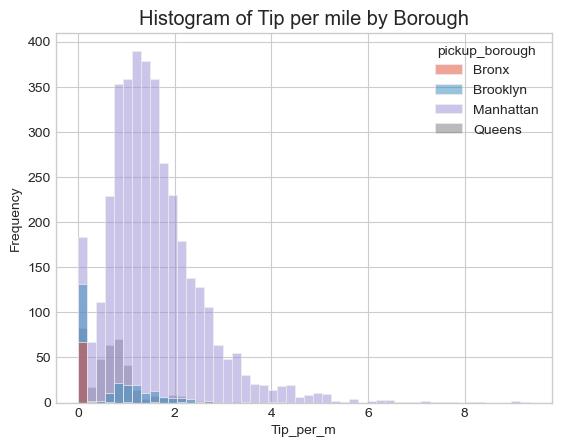

In [418]:
# Plot histogram using seaborn
sns.histplot(
    data= df_taxi_clean[(df_taxi_clean.distance > 0.1) & (df_taxi_clean.pickup_borough != 'NA')&(df_taxi_clean.payment == "credit card") & (df_taxi_clean.tip_per_m<10)]
    .sort_values('pickup_borough'), 
    x='tip_per_m', hue='pickup_borough', bins=50)

# Set plot title and labels
plt.title('Histogram of Tip per mile by Borough')
plt.xlabel('Tip_per_m')
plt.ylabel('Frequency')

# Show the plot
plt.show()

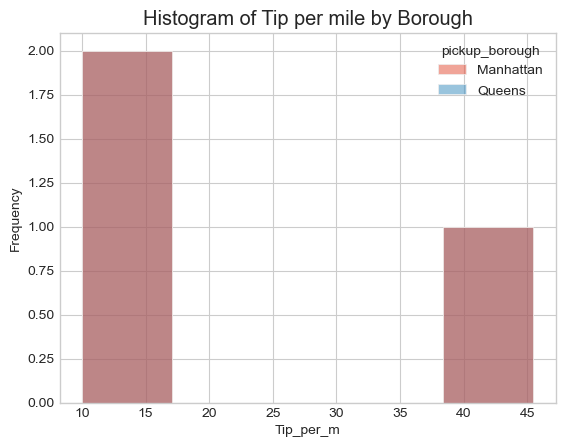

In [419]:
# Plot histogram using seaborn
sns.histplot(
    data= df_taxi_clean[(df_taxi_clean.distance > 0.1) & (df_taxi_clean.pickup_borough != 'NA')&(df_taxi_clean.payment == "credit card") & (df_taxi_clean.tip_per_m >=10)]
    .sort_values('pickup_borough'), 
    x='tip_per_m', hue='pickup_borough', bins=5)

# Set plot title and labels
plt.title('Histogram of Tip per mile by Borough')
plt.xlabel('Tip_per_m')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Також я хотіла перевірити, чи більша кількість пасажирів призводить до більших чайових, щоб зберегти зв'язок між чайовими, відстанню та тарифом, я також використовую колонку "fare".

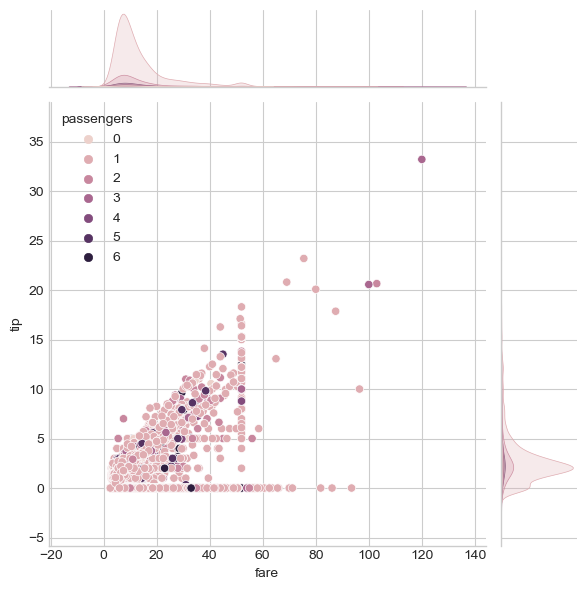

In [420]:
sns.jointplot(data=df_taxi_clean[df_taxi_clean.payment == "credit card"], x="fare", y="tip", hue="passengers");

При більшій кількості пасажирів, лінія не піднімається вище, отже, більша кількість пасажирів не суттєво збільшує суму чайових.

Проте, тут ми можемо побачити, що тариф у розмірі 50 доларів є популярним, можливо, це стандартний тариф у деяких випадках, ми могли б перевірити це. Також помітно, що 5 доларів чайових є загальними.

Тепер я хочу перевірити, куди зазвичай користувачі їдуть з кожного району. Також я хотів би побачити, як працювати з двома категоріальними змінними в Python.

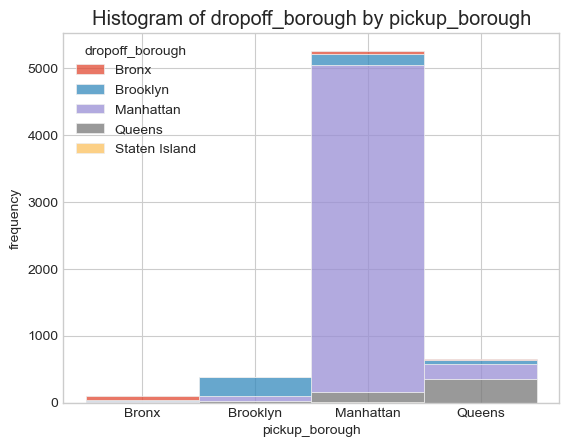

In [421]:
# Plot histogram using seaborn

sns.histplot(data= df_taxi_clean[(df_taxi_clean['pickup_borough'] != 'NA') & (df_taxi_clean['dropoff_borough'] != 'NA')].sort_values('pickup_borough'), x='pickup_borough', hue='dropoff_borough', multiple='stack')

# Set plot title and labels
plt.title('Histogram of dropoff_borough by pickup_borough')
plt.xlabel('pickup_borough')
plt.ylabel('frequency')

# Show the plot
plt.show()

In [422]:
# Calculate category-wise percentages and normalize
category_perc = df_taxi_clean[(df_taxi_clean['pickup_borough'] != 'NA') & (df_taxi_clean['dropoff_borough'] != 'NA')].groupby('pickup_borough')['dropoff_borough'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
category_perc_pivot = category_perc.pivot_table(index = 'pickup_borough', columns = 'dropoff_borough', values = 'Percentage', aggfunc ='sum')

In [423]:
category_perc.pivot_table(index = 'pickup_borough', columns = 'dropoff_borough', values = 'Percentage', aggfunc ='sum')

dropoff_borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
pickup_borough,,,,,
Bronx,66.666667,4.040404,25.252525,4.040404,NaN
Brooklyn,1.315789,74.210526,17.631579,6.842105,NaN
Manhattan,1.046025,2.909852,92.906048,3.100038,0.038037
Queens,1.705426,9.612403,34.728682,53.953488,NaN


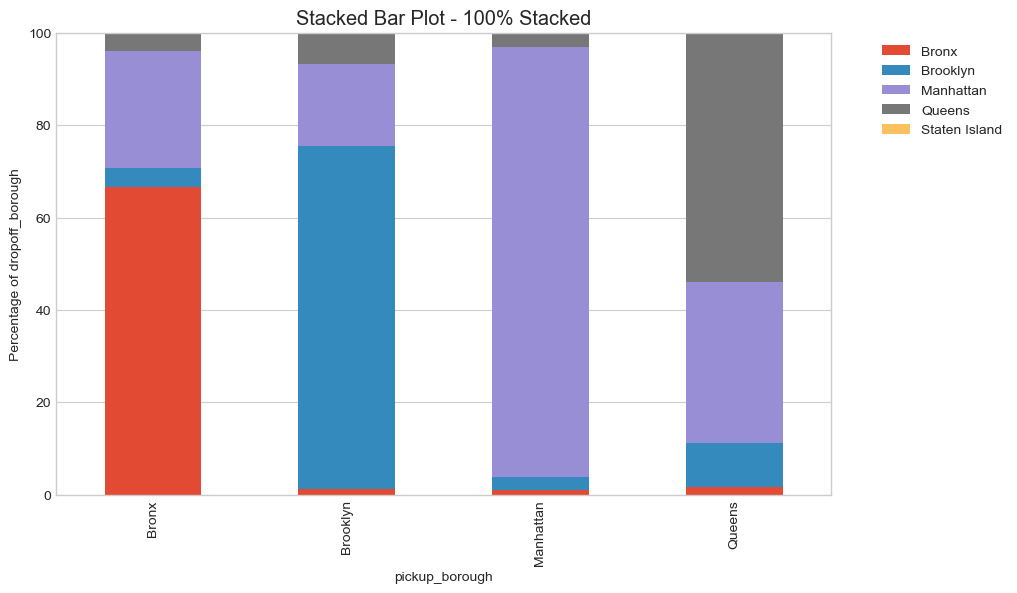

In [424]:
category_perc_pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# Set y-axis limit to 100%
plt.ylim(0, 100)

# Set plot title and labels
plt.title('Stacked Bar Plot - 100% Stacked')
plt.xlabel('pickup_borough')
plt.ylabel('Percentage of dropoff_borough')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show();

Зауважимо, що користувачі зазвичай не залишають початковий район, але якщо вони це роблять, то найчастіше вони їдуть до Мангеттену.

Після всього цього я б хотіла перевірити зв'язки між числовими значеннями і шукати нові ідеї для дослідження.

In [425]:
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

In [426]:
import warnings
warnings.filterwarnings("ignore")

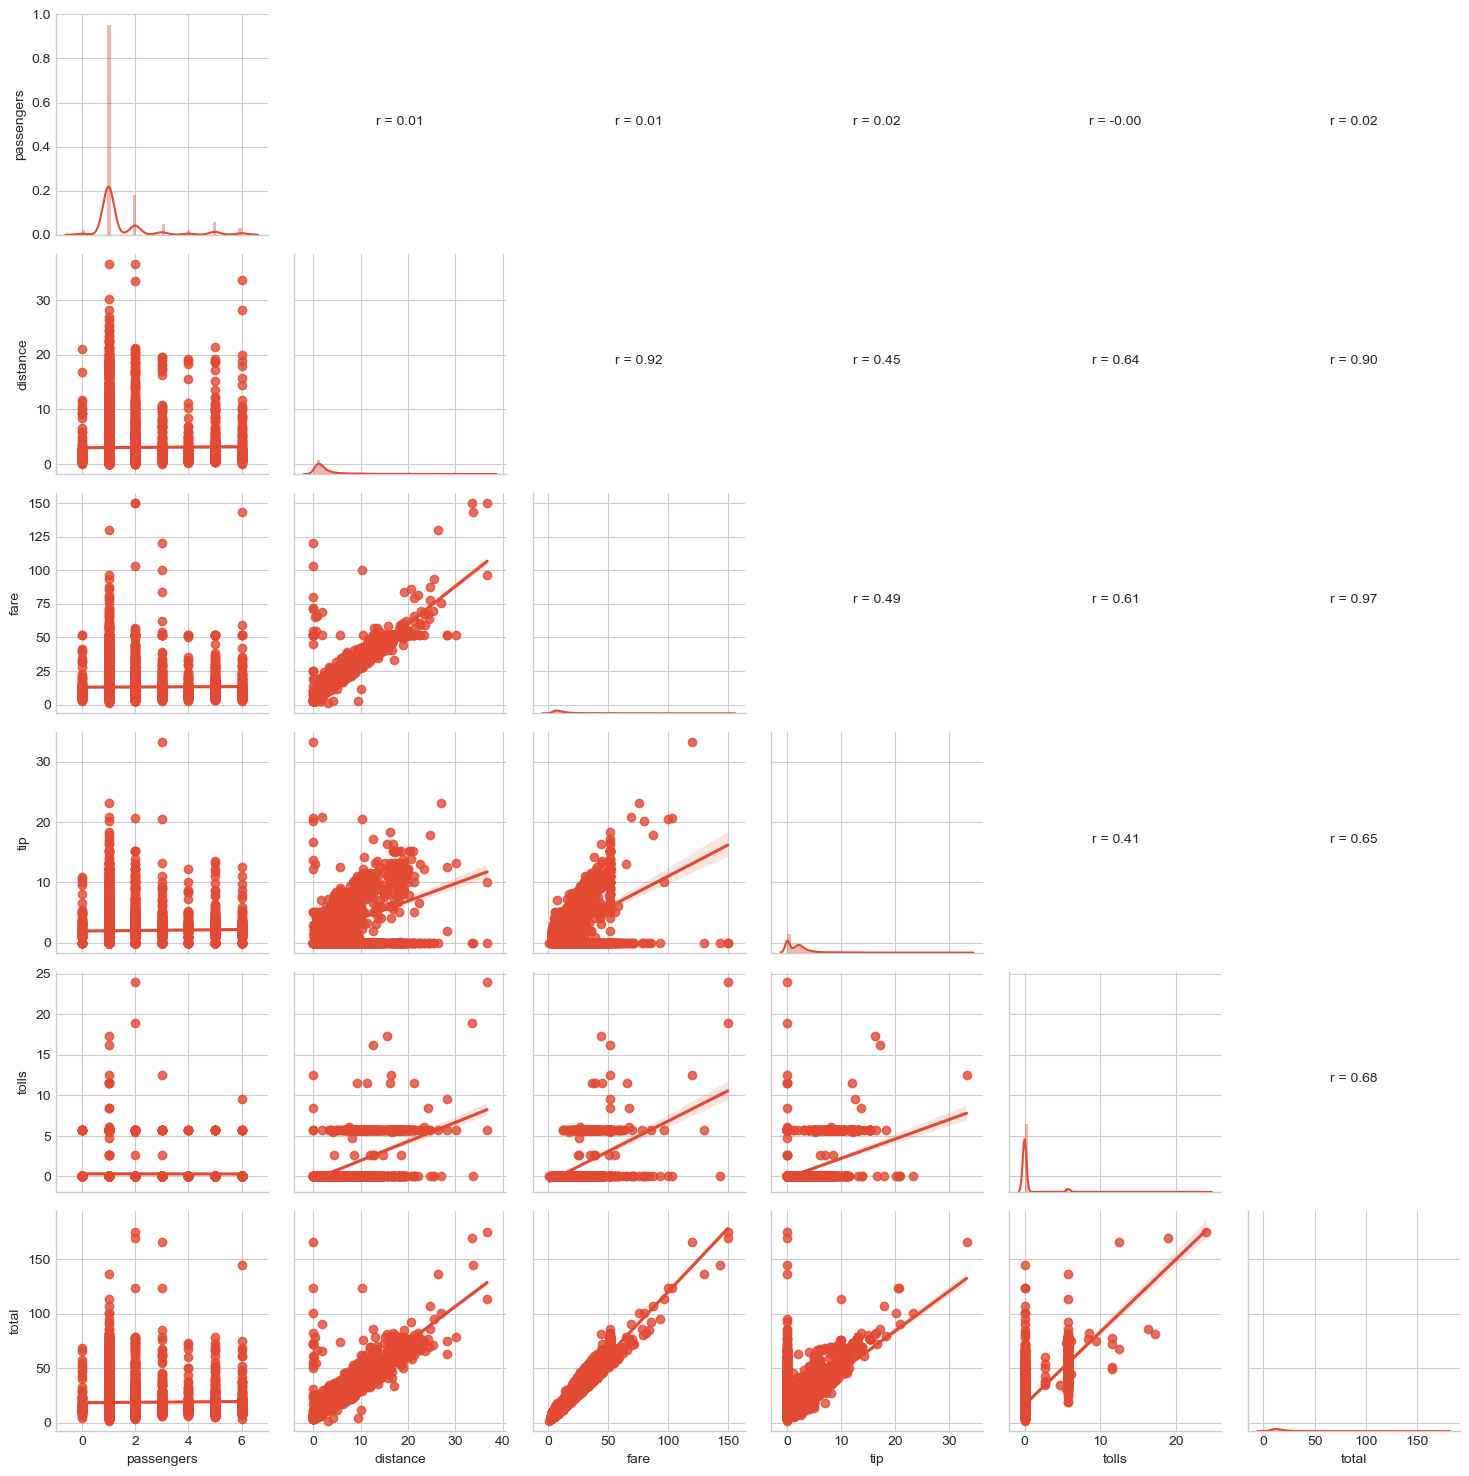

In [427]:
g = sns.PairGrid(df_taxi_clean)

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);

Давайте подивимось, які зв'язки змінюються, якщо ми розглядаємо лише добре відстежувані платежі з кредитною карткою.
Єдиною значною різницею є те, що зв'язки між чайовими та загальною сумою або платою за проїзд стають сильнішими.

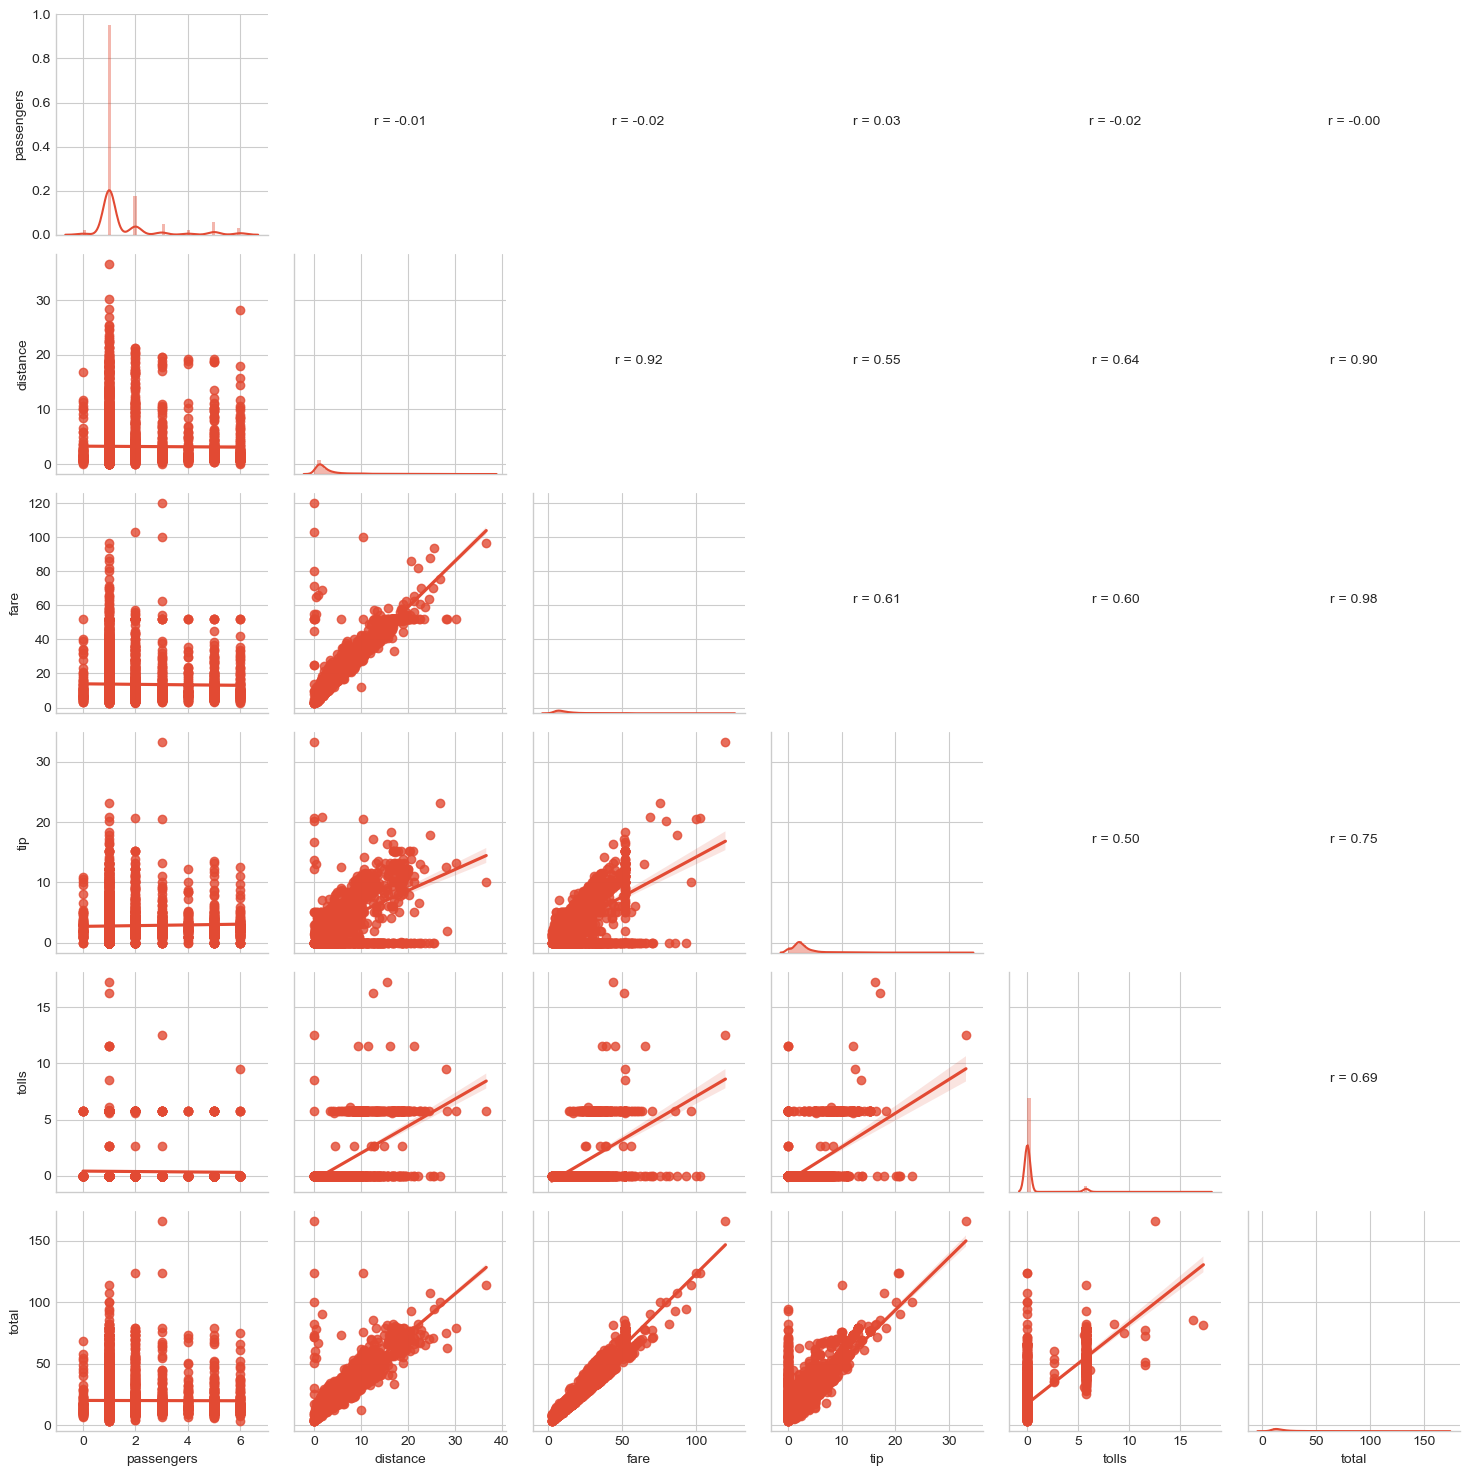

In [428]:
g = sns.PairGrid(df_taxi_clean[df_taxi_clean.payment == "credit card"])

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);